In [3]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
timed_df = pd.read_csv("close_prices.csv")
timed_df.fillna(0, inplace=True)

timed_df['Date'] = pd.to_datetime(timed_df['Date'])
timed_df.set_index('Date', inplace=True)

# Drop columns where every entry is 0.0
timed_df = timed_df.loc[:, (timed_df != 0).any(axis=0)]

# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(timed_df)
timed_df = timed_df.loc[:, (timed_df != 0).sum() >= threshold]

In [5]:
timed_df

,ABB,AEGISLOG,AMARAJABAT,AMBALALSA,ANDHRAPET,ANSALAPI,ARUNAHTEL,BOMDYEING,ASIANHOTNR,ATUL,...,BENGALASM,SUNDARAM,TAMBOLI,KCPSUGIND,KECL,KTIL,ZENTEC,APLAPOLLO,TERASOFT,STEELXIND
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,53.989998,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.839999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-04,52.599998,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.579999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-05,52.200001,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,13.799999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-06,56.000000,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.189999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-07,54.000000,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,13.299999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-06,4132.799805,326.799988,644.150024,40.500000,77.339996,0.0,15.870000,145.449997,139.600006,7027.399902,...,5626.049805,3.44,170.050003,35.900002,126.050003,55.049999,728.250000,1617.050049,46.310001,8.80
2023-10-09,4095.149902,322.700012,634.549988,41.310001,74.269997,14.3,14.930000,141.300003,129.649994,6889.799805,...,5610.049805,3.36,168.300003,36.660000,127.150002,55.000000,709.450012,1572.150024,44.180000,7.98
2023-10-10,4189.149902,323.299988,635.250000,42.130001,74.580002,0.0,15.000000,149.949997,133.500000,6882.899902,...,5645.899902,3.34,178.000000,38.480000,130.899994,52.730000,744.900024,1615.250000,47.060001,8.49


In [6]:
# Assuming timed_df is your DataFrame indexed by date

# Set the desired start and end dates
start_date = '2010-01-05'
end_date = '2019-01-05'

# Use loc to select rows within the specified date range
timed_df = timed_df.loc[start_date:end_date]

# Set the desired number of columns to keep
num_columns_to_keep = 100 #Replace with your desired number

# first num columns
# timed_df = timed_df.iloc[:, :num_columns_to_keep]

# last num columns 
# timed_df = timed_df.iloc[:, -num_columns_to_keep:]

#random num columns
timed_df = timed_df.sample(n=num_columns_to_keep, axis=1)


timed_df.columns

Index(['OMAXAUTO', '7TEC', 'WALCHANNAG', 'PICTUREHS', 'ARCHIES', 'CILSEC',
       'ZENITHSTL', 'BHARATFORG', 'DHARFIN', 'SWADPOL', 'GAEL', 'AJANTPHARM',
       'TRANSFRE', 'SODFC', 'SUPTANERY', 'RAMGOPOLY', 'INTENTECH', 'RELIANCE',
       'INDPRUD', 'GICHSGFIN', 'MANAPPURAM', 'PEL', 'TFCILTD', 'CHRTEDCA',
       'SAGCEM', 'NDTV', 'HFCL', 'COFORGE', 'ISTLTD', 'SIGNETIND', 'GOKEX',
       'AEGISLOG', 'KANPRPLA', 'APARINDS', 'HINDTIN', 'ASIANENE', 'SUPREME',
       'HLVLTD', 'MPSLTD', 'HINDUST', 'GRASIM', 'MATHEWE', 'RAMAPPR-B',
       'JAICORPLTD', 'KKALPANAIND', 'DWARKESH', 'NGIND', 'RSYSTEMINT', 'SHARP',
       'VAIBHAVGBL', 'ASHCAP', 'CANBK', 'EUROTEXIND', 'SAINTGOBAIN',
       'URJAGLOBA', 'VINATIORGA', 'PARKERAC', 'JAGRAN', 'SWASTIVI', 'GUJCONT',
       'LEADFIN', 'SONATSOFTW', 'GULPOLY', 'UTLINDS', 'INDIAGLYCO',
       'RAJESHEXPO', 'ALBERTDA', 'JBFIND', 'CREATIVEYE', 'JINDALPHOT',
       'SURYALAXMI', 'SASKEN', 'PODARPIGQ', 'GRATEXI', 'PADAMCO', 'AVANTI',
       'BPL', 'MINDTECK',

In [7]:
timed_df

,OMAXAUTO,7TEC,WALCHANNAG,PICTUREHS,ARCHIES,CILSEC,ZENITHSTL,BHARATFORG,DHARFIN,SWADPOL,...,TIL,CHEMBOND,VAKRANGEE,SUNPHARMA,FINELINE,INDRAMEDCO,ASHIMASYN,SMFIL,EIMCOELECO,CUB
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,59.200001,6.410000,224.699997,6.87,18.799963,18.950001,22.458242,140.824997,6.25,44.150002,...,368.250000,50.000000,1.759999,155.374985,10.100000,45.200001,6.430000,4.70,285.500000,21.611568
2010-01-06,59.250000,6.200000,218.550003,7.00,18.899963,18.049999,22.208244,144.199997,6.45,44.150002,...,367.000000,50.000000,1.731249,156.869980,11.080000,48.150002,6.230000,4.90,288.500000,21.528925
2010-01-07,62.849998,6.130000,225.899994,6.68,18.749964,18.049999,22.458242,141.449997,6.77,44.150002,...,364.049988,50.000000,1.714999,154.199982,12.150000,49.950001,6.470000,5.00,288.799988,21.652891
2010-01-08,67.150002,6.000000,227.050003,6.75,19.249964,18.950001,23.083241,140.649994,7.10,44.150002,...,361.600006,0.000000,1.704999,157.454987,12.230000,48.349998,7.760000,5.40,297.750000,21.652891
2010-01-11,68.150002,6.460000,233.149994,7.08,19.609962,19.750000,23.666571,141.925003,7.45,44.150002,...,359.950012,51.275002,1.727499,157.254974,12.080000,50.650002,7.590000,5.60,291.850006,21.735535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,92.349998,22.299999,98.099998,2.30,31.600000,16.500000,0.000000,508.350006,3.04,1.269000,...,271.799988,327.450012,33.349998,430.649994,19.549999,39.049999,16.910000,0.92,410.000000,194.600006
2019-01-01,89.150002,23.400000,103.050003,2.07,30.500000,17.799999,0.600000,510.950012,3.04,1.269000,...,277.000000,327.000000,35.000000,433.100006,19.549999,39.599998,16.650000,0.92,411.000000,193.050003
2019-01-02,90.400002,24.549999,100.300003,1.90,29.750000,18.600000,0.600000,495.100006,3.04,1.332000,...,267.750000,325.549988,36.049999,440.299988,19.549999,39.150002,16.799999,0.92,401.000000,192.649994


In [8]:
# Show daily returns
returns = timed_df.pct_change()
returns.fillna(0, inplace=True)
returns.replace([np.inf, -np.inf], 0, inplace=True)

returns

,OMAXAUTO,7TEC,WALCHANNAG,PICTUREHS,ARCHIES,CILSEC,ZENITHSTL,BHARATFORG,DHARFIN,SWADPOL,...,TIL,CHEMBOND,VAKRANGEE,SUNPHARMA,FINELINE,INDRAMEDCO,ASHIMASYN,SMFIL,EIMCOELECO,CUB
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,0.000845,-0.032761,-0.027370,0.018923,0.005319,-0.047493,-0.011132,0.023966,0.032000,0.000000,...,-0.003394,0.000000,-0.016335,0.009622,0.097030,0.065266,-0.031104,0.042553,0.010508,-0.003824
2010-01-07,0.060759,-0.011290,0.033631,-0.045714,-0.007937,0.000000,0.011257,-0.019071,0.049612,0.000000,...,-0.008038,0.000000,-0.009386,-0.017020,0.096570,0.037383,0.038523,0.020408,0.001040,0.005758
2010-01-08,0.068417,-0.021207,0.005091,0.010479,0.026667,0.049862,0.027829,-0.005656,0.048744,0.000000,...,-0.006730,-1.000000,-0.005831,0.021109,0.006584,-0.032032,0.199382,0.080000,0.030990,0.000000
2010-01-11,0.014892,0.076667,0.026866,0.048889,0.018701,0.042216,0.025271,0.009065,0.049296,0.000000,...,-0.004563,0.000000,0.013197,-0.001270,-0.012265,0.047570,-0.021907,0.037037,-0.019815,0.003817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,0.015952,0.027650,-0.008590,0.000000,-0.001580,0.000000,0.000000,0.002169,0.048276,0.000000,...,-0.004396,0.001376,-0.033333,0.014249,0.000000,0.009044,0.007747,0.000000,0.024744,0.037590
2019-01-01,-0.034651,0.049327,0.050459,-0.100000,-0.034810,0.078788,0.000000,0.005115,0.000000,0.000000,...,0.019132,-0.001374,0.049475,0.005689,0.000000,0.014084,-0.015376,0.000000,0.002439,-0.007965
2019-01-02,0.014021,0.049145,-0.026686,-0.082126,-0.024590,0.044944,0.000000,-0.031021,0.000000,0.049645,...,-0.033394,-0.004434,0.030000,0.016624,0.000000,-0.011364,0.009009,0.000000,-0.024331,-0.002072


In [9]:
# Annualized covariance matrix

# cov_matrix_annual = returns.cov()*252
cov_matrix_annual = returns.cov()*246
cov_matrix_annual.fillna(0, inplace=True)
cov_matrix_annual

,OMAXAUTO,7TEC,WALCHANNAG,PICTUREHS,ARCHIES,CILSEC,ZENITHSTL,BHARATFORG,DHARFIN,SWADPOL,...,TIL,CHEMBOND,VAKRANGEE,SUNPHARMA,FINELINE,INDRAMEDCO,ASHIMASYN,SMFIL,EIMCOELECO,CUB
OMAXAUTO,1.031398,0.138340,0.064244,0.124634,0.071740,0.138971,-0.007804,0.032242,0.113588,0.115089,...,0.047858,0.087426,0.025372,0.013807,0.110601,0.030091,0.148350,0.128692,0.083230,0.024708
7TEC,0.138340,0.668462,0.028799,0.217793,0.028423,0.243674,0.015890,0.011818,0.223648,0.225295,...,0.023327,0.093454,0.007026,0.002750,0.217700,0.021120,0.004200,0.229349,0.005260,0.012216
WALCHANNAG,0.064244,0.028799,0.233975,0.017631,0.070939,0.025855,0.049565,0.050303,0.003349,0.002076,...,0.071988,-0.019249,0.035351,0.019065,0.005306,0.041575,0.083527,0.011865,0.036507,0.025882
PICTUREHS,0.124634,0.217793,0.017631,0.745774,0.010699,0.227886,-0.011021,0.003153,0.216105,0.222694,...,0.007065,0.032994,0.007561,0.006597,0.219529,0.009149,0.039421,0.216471,0.081469,0.001940
ARCHIES,0.071740,0.028423,0.070939,0.010699,0.410896,0.011639,-0.013272,0.043712,0.002708,-0.004311,...,0.065654,-0.016093,0.041895,0.021434,-0.008548,0.035299,0.066141,-0.004014,0.026439,0.031456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INDRAMEDCO,0.030091,0.021120,0.041575,0.009149,0.035299,0.015768,0.026997,0.022167,0.006019,0.000912,...,0.036155,-0.011086,0.022375,0.014338,0.000592,0.101817,0.042034,0.015911,0.025585,0.017285
ASHIMASYN,0.148350,0.004200,0.083527,0.039421,0.066141,0.039800,-0.023212,0.035844,0.007828,0.003436,...,0.179593,0.229630,0.019509,0.002286,0.027214,0.042034,4.469187,-0.052932,-0.065815,0.018667
SMFIL,0.128692,0.229349,0.011865,0.216471,-0.004014,0.223026,0.010357,0.000822,0.217822,0.220739,...,0.003583,0.038098,0.017663,0.007467,0.223236,0.015911,-0.052932,1.357267,0.157379,0.003398
EIMCOELECO,0.083230,0.005260,0.036507,0.081469,0.026439,0.008930,0.069196,0.007104,-0.002783,0.005359,...,0.012314,0.273111,0.018386,0.030644,-0.006111,0.025585,-0.065815,0.157379,4.336059,0.026520


In [10]:
weights = np.full(timed_df.shape[1], 1 / timed_df.shape[1])
weights

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [11]:
# Calculate PORTFOLIO variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.09545439023397538

In [12]:
# Calculate PORTFOLIO volatility (std. dev)
port_volatility = np.sqrt(port_variance)
port_volatility

0.3089569391257872

In [13]:
# Annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

-1.396231746682615

In [14]:
# DISPLAY

percent_var = str(round(port_variance, 2)*100) + "%"
percent_vol = str(round(port_volatility, 2)*100) + "%"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print ("Expected Annual Return: " + percent_ret)
print ("Annual Volatility: " + percent_vol)
print ("Annual Variance: " + percent_var)

Expected Annual Return: -140.0%
Annual Volatility: 31.0%
Annual Variance: 10.0%


# OPTIMIZATION

In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [16]:
mu = expected_returns.mean_historical_return(timed_df, frequency=252)

# mu = expected_returns.ema_historical_return(timed_df)

# mu = expected_returns.return_model(timed_df)


# mu = expected_returns.capm_return(timed_df)


mu.fillna(0, inplace = True)
mu.replace(np.inf, 0.0, inplace=True)

In [17]:
# S = risk_models.sample_cov(timed_df)

S = risk_models.exp_cov(timed_df)

# S = risk_models.CovarianceShrinkage(timed_df)

# S = (S + S.T) / 2

S.fillna(0, inplace = True)
S.replace(np.inf, 0.0, inplace=True)

In [18]:
# S_normalized
# S_f = (S + S.T) / 2

#S_reg
S_f = S + 1e-6 * np.eye(S.shape[0])


In [19]:
# ef = EfficientFrontier(mu, S)
ef = EfficientFrontier(mu, S_f, solver="ECOS")
# solvers: ECOS, OSQP

# weights = ef.max_sharpe()


# Maximize Return for a Target Volatility:
# weights = ef.efficient_return(target_return=0.10)

# Minimize Volatility for a Target Return:
weights = ef.efficient_risk(target_volatility=0.30)

refined_weights = ef.clean_weights()


In [20]:
print(refined_weights)
print(weights)
print(ef)

OrderedDict([('OMAXAUTO', 0.0), ('7TEC', 0.0), ('WALCHANNAG', 0.0), ('PICTUREHS', 0.0), ('ARCHIES', 0.0), ('CILSEC', 0.0), ('ZENITHSTL', 0.0), ('BHARATFORG', 0.0), ('DHARFIN', 0.0), ('SWADPOL', 0.0), ('GAEL', 0.0), ('AJANTPHARM', 0.79201), ('TRANSFRE', 0.0), ('SODFC', 0.0), ('SUPTANERY', 0.0), ('RAMGOPOLY', 0.0), ('INTENTECH', 0.0), ('RELIANCE', 0.0), ('INDPRUD', 0.0), ('GICHSGFIN', 0.0), ('MANAPPURAM', 0.0), ('PEL', 0.0), ('TFCILTD', 0.0), ('CHRTEDCA', 0.0), ('SAGCEM', 0.0), ('NDTV', 0.0), ('HFCL', 0.0), ('COFORGE', 0.0), ('ISTLTD', 0.0), ('SIGNETIND', 0.0), ('GOKEX', 0.0), ('AEGISLOG', 0.0), ('KANPRPLA', 0.0), ('APARINDS', 0.0), ('HINDTIN', 0.0), ('ASIANENE', 0.0), ('SUPREME', 0.0), ('HLVLTD', 0.0), ('MPSLTD', 0.0), ('HINDUST', 0.0), ('GRASIM', 0.0), ('MATHEWE', 0.0), ('RAMAPPR-B', 0.0), ('JAICORPLTD', 0.0), ('KKALPANAIND', 0.0), ('DWARKESH', 0.0), ('NGIND', 0.0), ('RSYSTEMINT', 0.0), ('SHARP', 0.0), ('VAIBHAVGBL', 0.0), ('ASHCAP', 0.0), ('CANBK', 0.0), ('EUROTEXIND', 0.0), ('SAINTGO

In [21]:
print ()
print ()
print ("-----PORTFOLIO PERFORMANCE-----")
print ()


ef.portfolio_performance(verbose = True)


print ()
print ()
print ("-----ASSET ALLOCATION-----")
print ()


refined_weights = {key: value for key, value in refined_weights.items() if value != 0.0}

# Normalize the percentages
total_weight = sum(refined_weights.values())
refined_weights_percent = {key: (value / total_weight) * 100 for key, value in refined_weights.items()}
assest = []
weight = {}
for key, value in refined_weights_percent.items():
    assest.append(key)
    weight[key] = value
    print(f"{key}: {value:.2f}%")




-----PORTFOLIO PERFORMANCE-----

Expected annual return: 58.1%
Annual volatility: 30.0%
Sharpe Ratio: 1.87


-----ASSET ALLOCATION-----

AJANTPHARM: 79.20%
VINATIORGA: 9.17%
VAKRANGEE: 7.98%
CUB: 3.65%


In [22]:
newTimeDf = timed_df[[i for i in weight.keys()]]

In [23]:
import math


def DiscreteAllocation(timed_df, weight, investAmount, startDate):
    reminder = 0
    newWeights = {}
    for key, value in weight.items():
        allocatedPrice = (value*investAmount*0.01)
        # Use Start date in iloc
        units = math.floor(allocatedPrice / timed_df[key][startDate])
        print(units)
        rem: pd.Series = allocatedPrice - units * timed_df[key][startDate]
        print(rem)
        newWeights[key] = {"price": value, "units": units, "allocated": (
            value*investAmount*0.01), "reminder": rem}
        reminder += rem

    return reminder, newWeights

r, weights = DiscreteAllocation(newTimeDf, weight,100000, start_date)

7701
0.5052146911475575
271
26.75
4534
1.1643671989450013
168
14.256500244141534


In [38]:
weights

{'AJANTPHARM': {'price': 79.201,
  'units': 7701,
  'allocated': 79200.99999999999,
  'reminder': 0.5052146911475575},
 'VINATIORGA': {'price': 9.173,
  'units': 271,
  'allocated': 9173.0,
  'reminder': 26.75},
 'VAKRANGEE': {'price': 7.981000000000001,
  'units': 4534,
  'allocated': 7981.000000000001,
  'reminder': 1.1643671989450013},
 'CUB': {'price': 3.6450000000000005,
  'units': 168,
  'allocated': 3645.0000000000005,
  'reminder': 14.256500244141534}}

In [39]:
from collections import defaultdict


def BackTest(df, startDate, duration, weights):
    """
    duration: in days
    startDate: starting date string
    weights: weights dict 
    """
    window = 2 #month
    start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
    end = start + datetime.timedelta(days=30*window)

    end_stop_date = start + datetime.timedelta(days=duration)
    x = defaultdict(dict)
    c = 1
    while end < end_stop_date:
        end = start + datetime.timedelta(days=30*window)
        temp = df.loc[start:end, :]

        # print(temp.iloc[-1,0])
        for i in weight.keys():
            x[i][c] = {
                "date_start": str(temp[i].iloc[0:].index[0])[:10],
                "date_end": str(temp[i].iloc[-1:].index[0])[:10],
                "date_start_price": temp[i].iloc[0],
                "date_end_price": temp[i].iloc[-1]
            }

        for key, values in x.items():
            st = values[c]["date_start_price"]
            en = values[c]["date_end_price"]

            st_price = st * weights[key]["units"]
            en_price = en * weights[key]["units"]
            pct_cng = (en_price - st_price)/st_price * 100
            values[c]["st_price"] = st_price
            values[c]["en_price"] = en_price

            values[c]["pct_change"] = pct_cng
        start = end
        c += 1

    return x, c-1

In [40]:
window, total_windows = BackTest(newTimeDf,"2010-01-05", 3000, weights)

In [41]:
print(window)

defaultdict(<class 'dict'>, {'AJANTPHARM': {1: {'date_start': '2010-01-05', 'date_end': '2010-03-05', 'date_start_price': 10.284442901611328, 'date_end_price': 13.817776679992676, 'st_price': 79200.49478530884, 'en_price': 106410.6982126236, 'pct_change': 34.356102826218795}, 2: {'date_start': '2010-03-08', 'date_end': '2010-05-05', 'date_start_price': 14.333332061767578, 'date_end_price': 17.355554580688477, 'st_price': 110380.99020767212, 'en_price': 133655.12582588196, 'pct_change': 21.08527525837701}, 3: {'date_start': '2010-05-05', 'date_end': '2010-07-02', 'date_start_price': 17.355554580688477, 'date_end_price': 19.18222045898437, 'st_price': 133655.12582588196, 'en_price': 147722.27975463864, 'pct_change': 10.524964038478064}, 4: {'date_start': '2010-07-05', 'date_end': '2010-09-02', 'date_start_price': 18.94222068786621, 'date_end_price': 21.079998016357425, 'st_price': 145874.0415172577, 'en_price': 162337.06472396853, 'pct_change': 11.285779865613156}, 5: {'date_start': '201

In [42]:
def PercentChange(window, totalWindows):
    pctChange = []
    endDate = []
    for part in range(1, totalWindows+1):
        startPrice = endPrice = 0
        end = None
        for key, value in window.items():
            cycle = window[key].get(part)
            startPrice += cycle['st_price']
            endPrice += cycle['en_price']
            # print(part , cycle['date_end'])
            end = cycle['date_end']
        endDate.append(end)
        pctChange.append(((endPrice - startPrice)/startPrice * 100))
    return pctChange, endDate

In [43]:
portfolioPercentChange, endDates = PercentChange(window, total_windows)

In [44]:
portfolio = pd.DataFrame({
    'Date': endDates,
    'PctChange': portfolioPercentChange
})


In [45]:
print(portfolio)

          Date  PctChange
0   2010-03-05  29.333794
1   2010-05-05  24.885917
2   2010-07-02  12.325614
3   2010-09-02   7.831933
4   2010-11-01   7.793799
5   2010-12-31  -9.150036
6   2011-03-01  -4.503361
7   2011-04-29  23.019642
8   2011-06-29  10.258878
9   2011-08-26  -1.084325
10  2011-10-25   3.331452
11  2011-12-26  -5.080851
12  2012-02-24  35.354455
13  2012-04-24  33.333857
14  2012-06-22  16.614135
15  2012-08-22  21.119870
16  2012-10-19  -5.935749
17  2012-12-20   3.989430
18  2013-02-18  39.521750
19  2013-04-18  15.407104
20  2013-06-18  24.275578
21  2013-08-16  -9.885921
22  2013-10-15  28.701252
23  2013-12-13  29.970336
24  2014-02-13   1.314142
25  2014-04-11   5.172802
26  2014-06-13  42.467233
27  2014-08-12   6.023600
28  2014-10-10  11.013543
29  2014-12-10  51.171551
30  2015-02-06  -5.048803
31  2015-04-09  38.625808
32  2015-06-08   4.114706
33  2015-08-07  12.707369
34  2015-10-06  -8.751380
35  2015-12-04 -10.702427
36  2016-02-03  -2.023162
37  2016-04-

<Axes: xlabel='Date', ylabel='PctChange'>

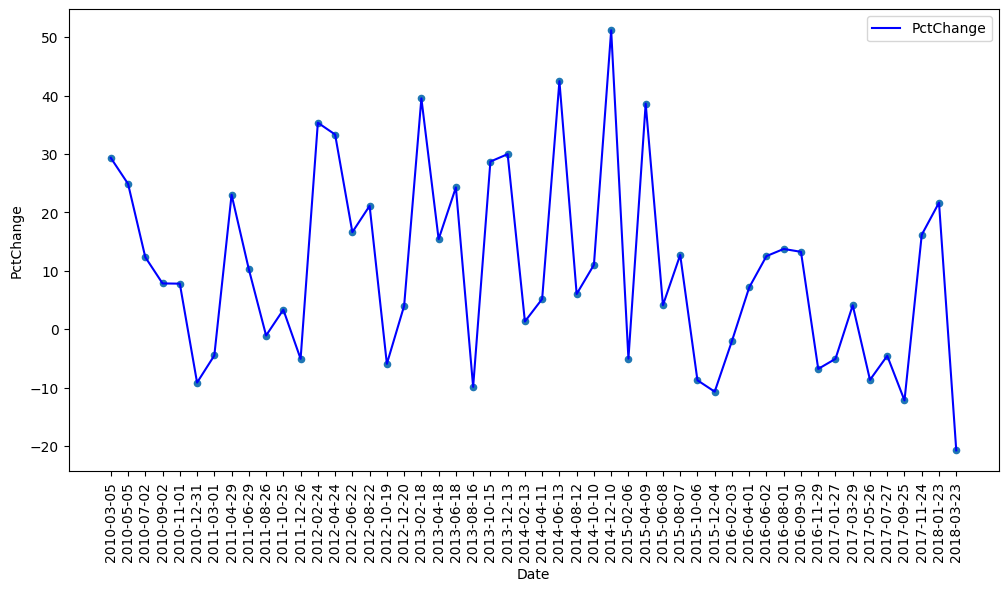

In [46]:
# plt.plot(data=portfolio)
ax = portfolio.plot(x="Date", y="PctChange", kind="scatter", figsize=[12,6], style='b', rot=90)
portfolio.plot(x="Date", y="PctChange", kind="line", ax=ax, style='b', rot=90)

In [34]:
nfity = pd.read_csv("nfity.csv")

In [36]:
nfity.set_index('Date', inplace=True)

In [37]:
nfity

,Unnamed: 0,Close
Date,,
2024-01-24,0,21465.90
2024-01-23,1,21238.80
2024-01-20,2,21571.80
2024-01-19,3,21622.40
2024-01-18,4,21462.25
...,...,...
2009-01-07,3727,2920.40
2009-01-06,3728,3112.80
2009-01-05,3729,3121.45
